In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
CSV_FILE = ".... Downloads/sae_for_glm_repo/data/steering_results/fixed_activation_steering.csv"
df = pd.read_csv(CSV_FILE)


In [14]:
df

,latent,steering_value,position,position_len,position_category,token_position,top1_id,top1_token,top1_logit,top1_prob,...,target_first_id,target_first_logit,target_first_prob,baseline_target_group_prob,baseline_wt_group_prob,top5_ids,top5_tokens,top5_logits,top5_probs,error
0,5561,-150.0,[568],1,masked,568,2811,CCGGTT,16.453053,0.453176,...,2785,13.121350,0.016193,0.06666,0.781788,2811|2779|763|2781|2780,CCGGTT|CCGTTT|ACGGTT|CCGTTG|CCGTTC,16.453053|15.842877|13.943656|13.608054|13.554259,0.453176|0.246190|0.036851|0.026345|0.024965,NaN
1,5561,-150.0,[567],1,nearby,568,2785,CCGTCG,18.122435,0.531414,...,2785,18.122435,0.531414,0.06666,0.781788,2785|2782|2529|2526|3041,CCGTCG|CCGTCA|CTGTCG|CTGTCA|CGGTCG,18.122435|17.575825|15.869009|14.669689|14.565422,0.531414|0.307640|0.055819|0.016824|0.015158,NaN
2,5561,-150.0,"[568, 567]",2,masked and nearby,568,2171,CATGTT,11.009590,0.075553,...,2785,7.696518,0.002750,0.06666,0.781788,2171|2175|2179|2144|2148,CATGTT|CATGCT|CATGGT|CATTCC|CATTGC,11.009590|10.615895|10.533531|9.678554|9.522967,0.075553|0.050965|0.046935|0.019961|0.017085,NaN
3,5561,-150.0,[468],1,far,568,2782,CCGTCA,20.928953,0.754902,...,2785,18.728188,0.083582,0.06666,0.781788,2782|2785|3038|2526|3041,CCGTCA|CCGTCG|CGGTCA|CTGTCA|CGGTCG,20.928953|18.728188|18.334522|18.002087|16.722857,0.754902|0.083582|0.056382|0.040436|0.011251,NaN
4,5561,-100.0,[568],1,masked,568,2811,CCGGTT,16.678272,0.439195,...,2785,13.311061,0.015146,0.06666,0.781788,2811|2779|2782|2780|2778,CCGGTT|CCGTTT|CCGTCA|CCGTTC|CCGTTA,16.678272|15.935842|14.804859|13.931710|13.767109,0.439195|0.209037|0.067460|0.028173|0.023898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1609,100.0,[468],1,far,568,2782,CCGTCA,21.036978,0.773723,...,2785,18.749355,0.078539,0.06666,0.781788,2782|2785|3038|2526|3041,CCGTCA|CCGTCG|CGGTCA|CTGTCA|CGGTCG,21.036978|18.749355|18.336185|17.979612|16.617077,0.773723|0.078539|0.051957|0.036374|0.009312,NaN
1436,1609,150.0,[568],1,masked,568,2785,CCGTCG,13.884994,0.182246,...,2785,13.884994,0.182246,0.06666,0.781788,2785|2782|2801|2819|2783,CCGTCG|CCGTCA|CCGCCG|CCGGGT|CCGTCT,13.884994|13.420786|12.799891|12.666292|12.209998,0.182246|0.114566|0.061575|0.053874|0.034136,NaN
1437,1609,150.0,[567],1,nearby,568,2782,CCGTCA,16.177029,0.257173,...,2785,15.530157,0.134677,0.06666,0.781788,2782|2526|2529|2785|2545,CCGTCA|CTGTCA|CTGTCG|CCGTCG|CTGCCG,16.177029|16.042850|15.770494|15.530157|13.889257,0.257173|0.224881|0.171265|0.134677|0.026101,NaN
1438,1609,150.0,"[568, 567]",2,masked and nearby,568,183,AACGAT,7.769000,0.012928,...,2785,2.792273,0.000089,0.06666,0.781788,183|2231|3255|3239|2167,AACGAT|CACGAT|GACGAT|GACCAT|CATGAT,7.769000|7.763903|7.715783|7.574588|7.498360,0.012928|0.012862|0.012258|0.010644|0.009862,NaN


In [15]:
latent_annotations = {
    5561: ['small t antigen'],
    4837: ['TEF promoter'],
    628: ['MESV Ψ'],
    4903: ['AAV2 ITR'],
    3104: ['gag (truncated)'],
    3322: ['rrnB T2 terminator'],
    1271: ['PDK intron', 'cat'],
    4420: ['SmR'],
    4067: ['araC'],
    5715: ['PGK promoter'],
    189: ['UbC promoter'],
    3619: ['T3 promoter'],
    5066: ['kanMX', 'KanR'],
    954: ['YPB1_ECOLX'],
    5971: ['rop'],
    7319: ['ccdB'],
    6437: ['lacI'],
    681: ['C9orf85'],
    5784: ['Ac5 promoter'],
    3258: ['int'],
    1540: ['HIV-1 DIS', 'HIV-1 Ψ'],
    7746: ['IRES Picorna 2', 'IRES'],
    4170: ['MHF1', 'ADH1 terminator'],
    1609: ['3xFLAG']
}

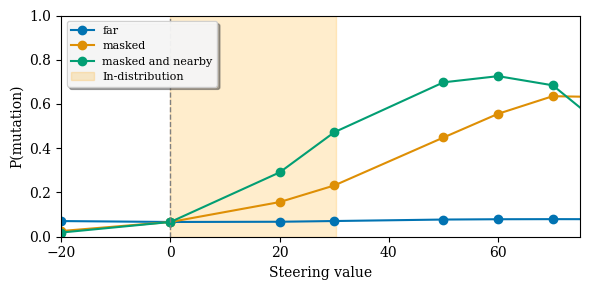

In [16]:
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.weight"] = "normal"
colors = sns.color_palette('colorblind')

def lineplot(x, y, label, color=None):
    plt.plot(x, y, marker="o", label=label, color=color)

FOCUS_LATENT = 5066
LATENT_ANNOTATIONS = latent_annotations[FOCUS_LATENT]

# ===== FIG A: P(mutation group) vs steering for the focus latent, by position category =====
focus = df[(df["latent"] == FOCUS_LATENT) & (df["position_category"] != "nearby")].copy()

plt.figure(figsize=(6, 3))
for i, (cat, sub) in enumerate(focus.groupby("position_category")):
    sub = sub.sort_values("steering_value")
    lineplot(sub["steering_value"], sub["target_group_prob"], cat, color=colors[i % len(colors)])

plt.axvline(0, linestyle="--", color="gray", linewidth=1)
max_value_ID = 30.2937
plt.axvspan(0, max_value_ID, color="orange", alpha=0.2, label="In-distribution")

plt.xlabel("Steering value")
plt.ylabel("P(mutation)")

# --- Legend (match style) ---
legend = plt.legend(        # or ax1.legend(...) if you’re using axes explicitly
    fontsize=8,
    frameon=True,
    fancybox=True,
    shadow=True,
    loc="upper left",
)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_alpha(0.9)

# start x-axis at -50
plt.xlim(-20, 75)
plt.ylim(0, 1)


plt.tight_layout()
plt.show()



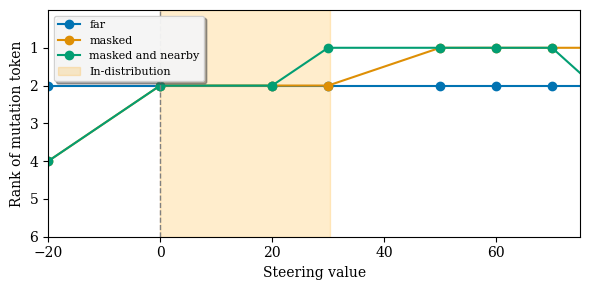

In [17]:

# ===== FIG B: Rank curve (masked vs nearby) for the focus latent =====
plt.figure(figsize=(6,3))
cats = ["far","masked", "masked and nearby"]
for i, cat in enumerate(cats):
    sub = focus[focus["position_category"] == cat].sort_values("steering_value")
    if not sub.empty:
        lineplot(sub["steering_value"], sub["target_group_best_rank"], cat, color=colors[i % len(colors)])

max_value_ID = 30.2937
plt.axvspan(0, max_value_ID, color="orange", alpha=0.2, label="In-distribution")

plt.axvline(0, linestyle="--", color="gray", linewidth=1)
plt.gca().invert_yaxis()
plt.yticks([1,2,3,4,5,6])
plt.xlabel("Steering value")
plt.ylabel("Rank of mutation token")

# --- Legend (match style) ---
legend = plt.legend(        # or ax1.legend(...) if you’re using axes explicitly
    fontsize=8,
    frameon=True,
    fancybox=True,
    shadow=True,
    loc="upper left",
)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_alpha(0.9)

# start x-axis at -50
plt.xlim(-20, 75)
plt.ylim(6, 0)

plt.tight_layout()
plt.show()


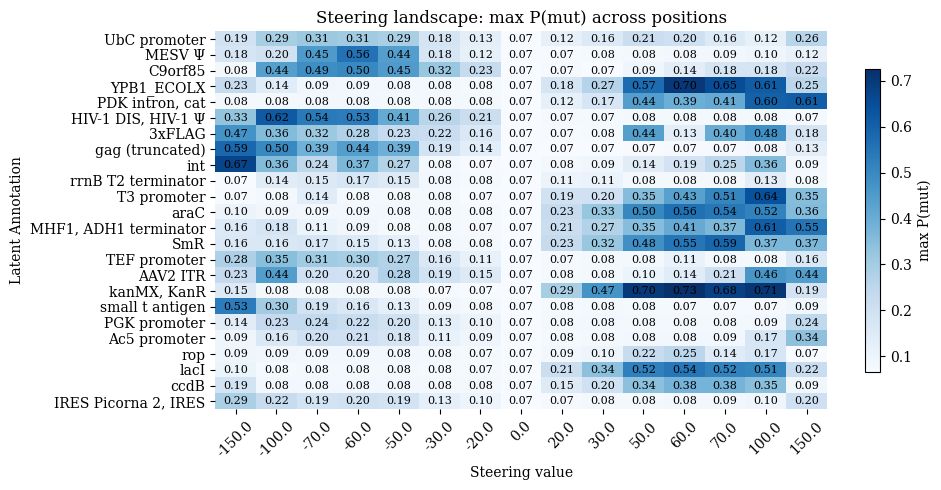

In [18]:

# ===== FIG C: Steering landscape heatmap (rows=latent, cols=steering, cell=max P(mut) across positions) =====
land = (
    df.groupby(["latent","steering_value"])["target_group_prob"]
      .max()
      .reset_index()
      .pivot(index="latent", columns="steering_value", values="target_group_prob")
      .sort_index()
)
Z = land.values.copy()
nan_mask = np.isnan(Z)
Z_display = np.where(nan_mask, np.nanmin(Z[np.isfinite(Z)]) - 1e-6, Z)

plt.figure(figsize=(10,5))
im = plt.imshow(Z_display, aspect="auto", cmap="Blues")
plt.title("Steering landscape: max P(mut) across positions", weight="normal")
plt.xlabel("Steering value")
plt.ylabel("Latent Annotation")
plt.xticks(np.arange(land.shape[1]), [str(c) for c in land.columns], rotation=45)

# Map latent IDs to annotations for y-axis
y_labels = []
for latent_id in land.index:
    if latent_id in latent_annotations:
        # Join multiple annotations with comma if present
        annotation = ', '.join(latent_annotations[latent_id])
        y_labels.append(annotation)
    else:
        # Fall back to latent ID if no annotation exists
        y_labels.append(str(latent_id))

plt.yticks(np.arange(land.shape[0]), y_labels)
for i in range(land.shape[0]):
    for j in range(land.shape[1]):
        val = land.iat[i, j]
        if pd.notnull(val):
            plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8)
plt.colorbar(im, shrink=0.8, label="max P(mut)")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

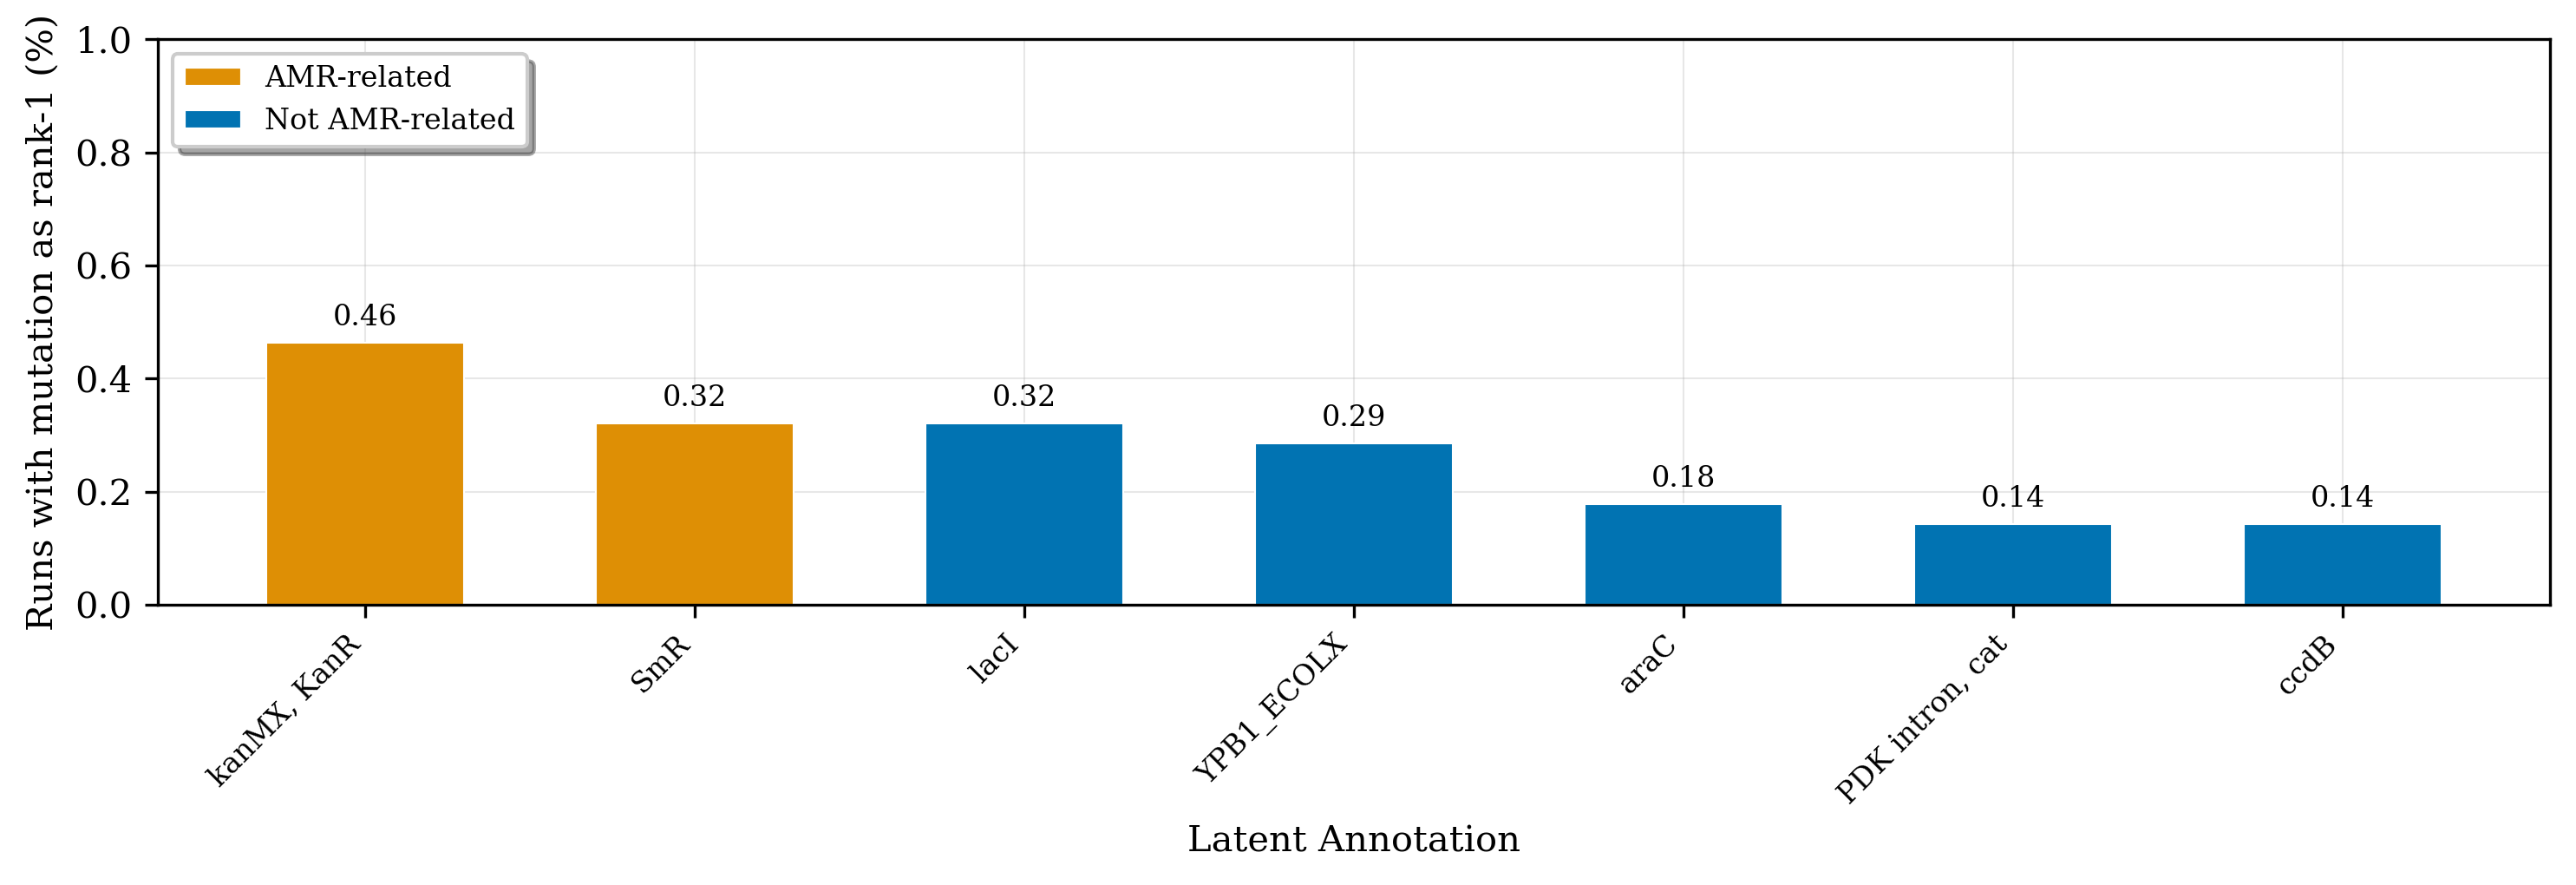

In [19]:
# ===== FIG D (optional): Specificity summary — fraction of runs with mutation as rank-1, by latent =====
spec = (
    df.assign(is_pos=df["steering_value"] > 0)
      .groupby(["latent", "is_pos"])["top1_is_target_group"]
      .mean()
      .reset_index()
      .pivot(index="latent", columns="is_pos", values="top1_is_target_group")
      .fillna(0.0)
      .rename(columns={False: "neg_steer", True: "pos_steer"})
)

# Sort descending by positive steering and take top 10
spec = spec.sort_values("pos_steer", ascending=False).head(7)

# --- Figure setup ---
fig, ax1 = plt.subplots(figsize=(10, 3.5), dpi=300)

x = np.arange(len(spec))
w = 0.6

# --- Color top-2 differently for AMR group ---
colors_bar = [colors[1] if i < 2 else colors[0] for i in range(len(spec))]

# --- Bars (single axis) ---
bars = ax1.bar(
    x,
    spec["pos_steer"],
    width=w,
    color=colors_bar,
    edgecolor="white",
    linewidth=0.5,
)

# --- Value labels ---
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=8,
        color="black",
    )

# --- X-axis labels: annotated latents ---
x_labels = []
for latent_id in spec.index:
    if latent_id in latent_annotations:
        annotation = ", ".join(latent_annotations[latent_id])
        x_labels.append(annotation)
    else:
        x_labels.append(str(latent_id))

ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=8)

# --- Axes labels ---
ax1.set_xlabel("Latent Annotation", fontsize=10)
ax1.set_ylabel("Runs with mutation as rank-1 (%)", fontsize=10)

# --- Title ---

# --- Grid & aesthetics ---
ax1.grid(True, alpha=0.3, linewidth=0.5)
ax1.set_axisbelow(True)

# --- Legend for AMR vs Non-AMR ---
from matplotlib.patches import Patch
legend_handles = [
    Patch(facecolor=colors[1], edgecolor="white", label="AMR-related"),
    Patch(facecolor=colors[0], edgecolor="white", label="Not AMR-related"),
]

legend = ax1.legend(
    handles=legend_handles,
    fontsize=8,
    frameon=True,
    fancybox=True,
    shadow=True,
    loc="upper left",
)

# reach of y-ax
ax1.set_ylim(0, 1)


plt.tight_layout()
plt.show()


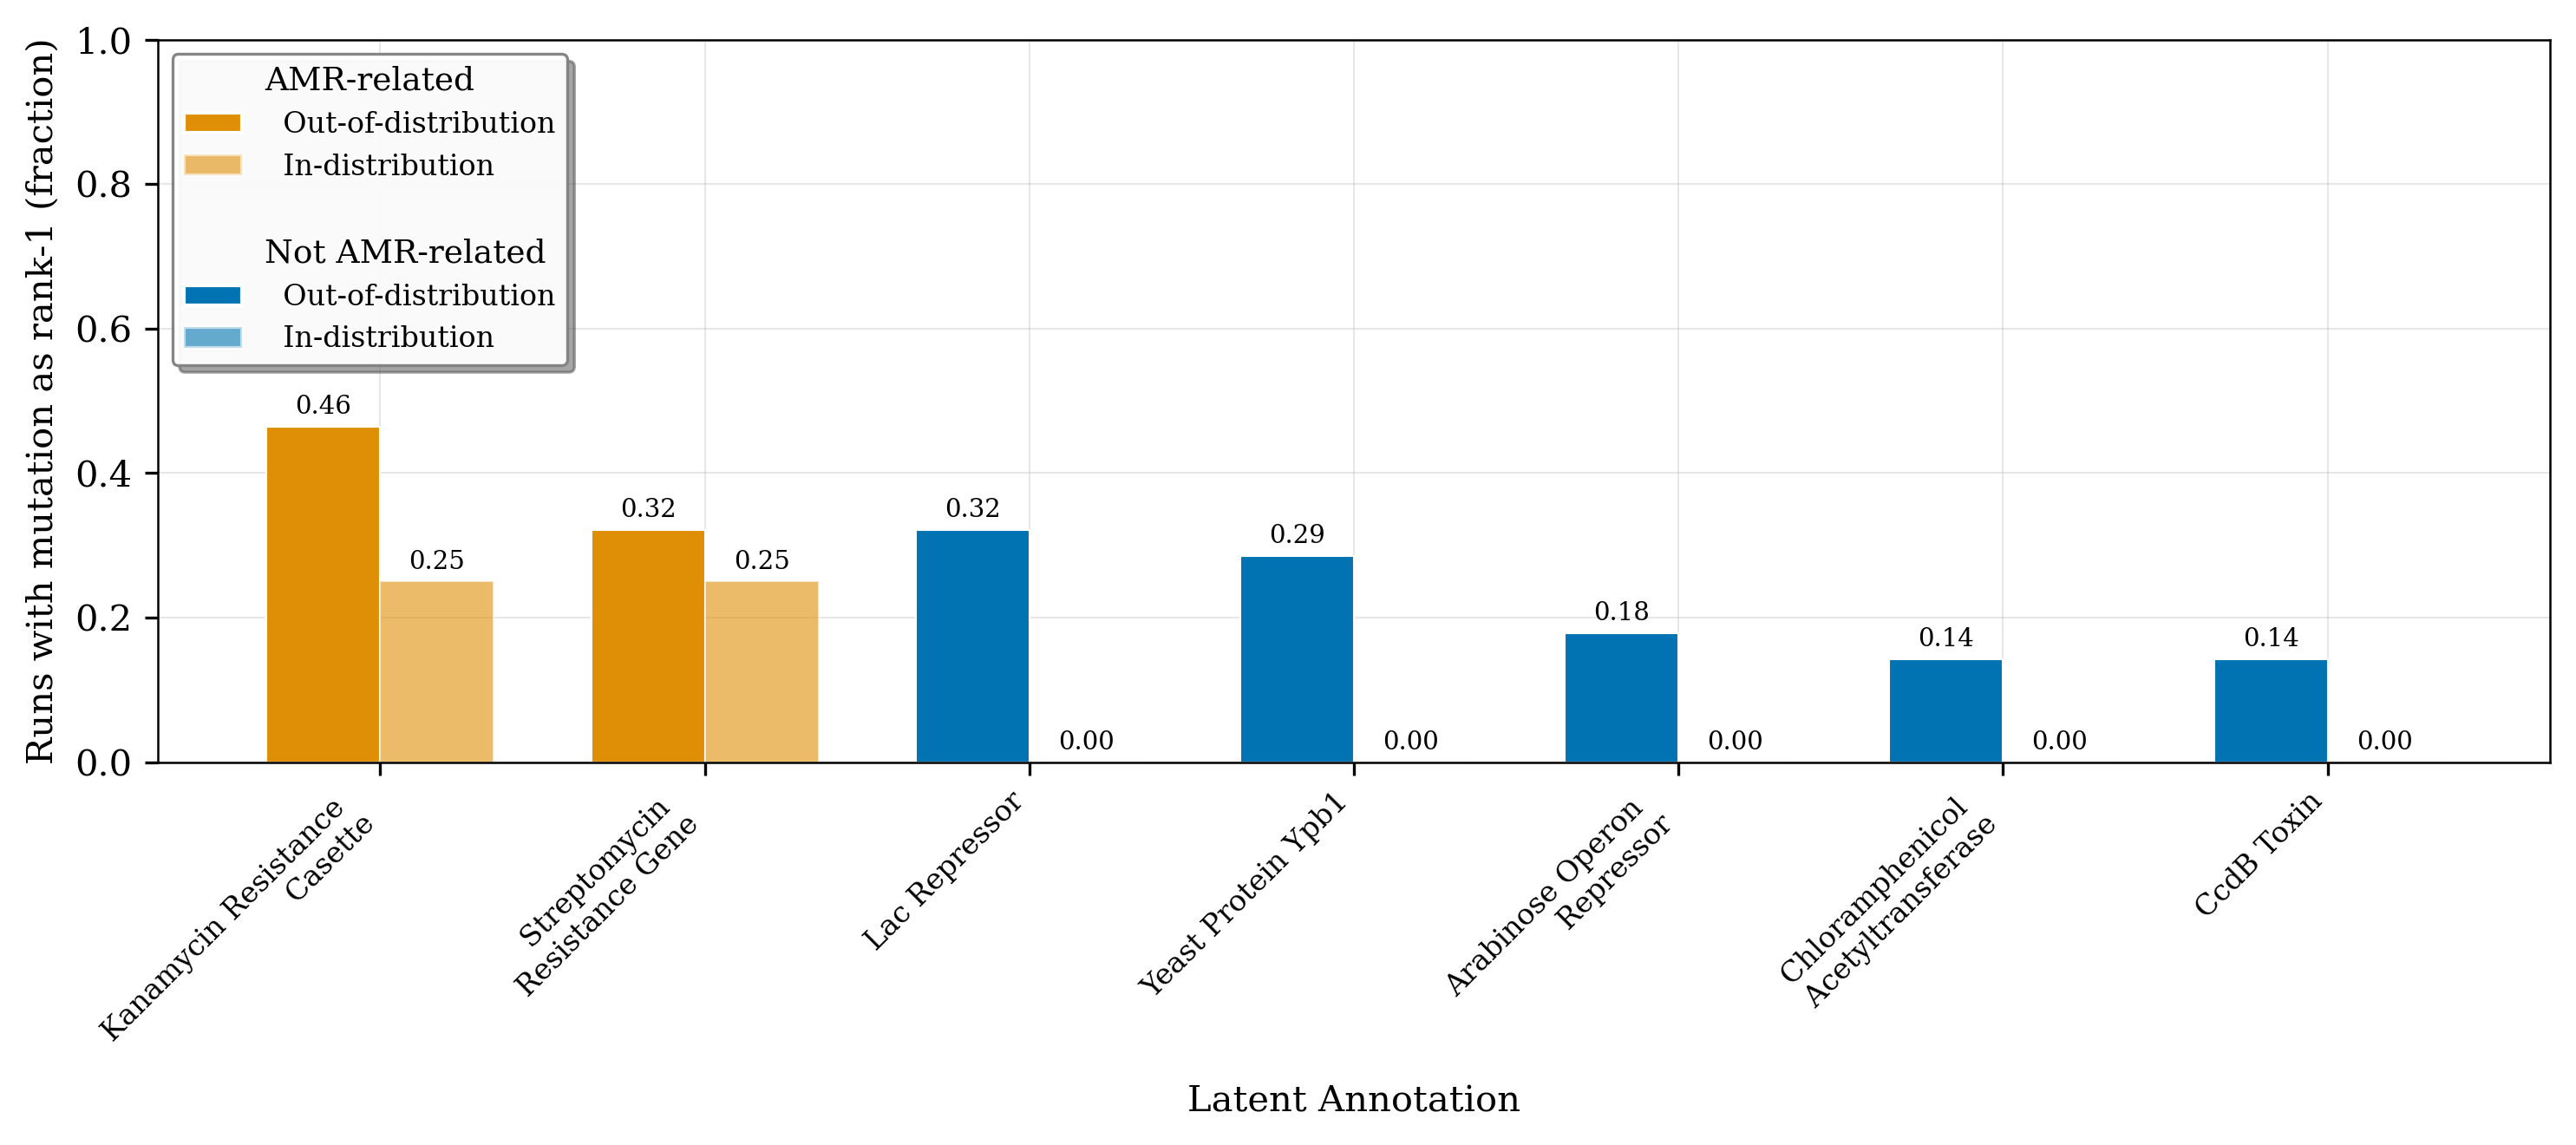

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


# ===== FIG D: Specificity summary — fraction of runs with mutation as rank-1, by latent =====
df1 = df  # original dataset
df2 = pd.read_csv("/home/maiwald/Downloads/max_activation_steering.csv")

def build_spec(df):
    spec = (
        df.assign(is_pos=df["steering_value"] > 0)
          .groupby(["latent", "is_pos"])["top1_is_target_group"]
          .mean()
          .reset_index()
          .pivot(index="latent", columns="is_pos", values="top1_is_target_group")
          .fillna(0.0)
          .rename(columns={False: "neg_steer", True: "pos_steer"})
    )
    # Ensure latent is numeric (helps sort)
    spec.index = spec.index.astype(int)
    return spec

# Build specs for both
spec1 = build_spec(df1)
spec2 = build_spec(df2)

# --- Sort df1 by pos_steer descending and take top N ---
top_latents = spec1.sort_values("pos_steer", ascending=False).head(7).index.tolist()

# --- Align df2 to these latents (fill with zeros if missing) ---
spec1 = spec1.loc[top_latents]
spec2 = spec2.reindex(top_latents).fillna(0.0)

# --- Figure setup ---
fig, ax1 = plt.subplots(figsize=(10, 4.5), dpi=300)

x = np.arange(len(spec1))
w = 0.35

# --- Color top-2 differently for AMR group ---
colors_bar = [colors[1] if i < 2 else colors[0] for i in range(len(spec1))]

# --- Bars for df1 (Dataset 1) ---
bars1 = ax1.bar(
    x - w/2,
    spec1["pos_steer"],
    width=w,
    color=colors_bar,
    edgecolor="white",
    linewidth=0.5,
    label="Dataset 1",
)

# --- Bars for df2 (Dataset 2) ---
bars2 = ax1.bar(
    x + w/2,
    spec2["pos_steer"],
    width=w,
    color=colors_bar,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.6,
    label="Dataset 2",
)

# --- Add value labels on top of BOTH bars ---
# Labels for Dataset 1 bars
for bar, val in zip(bars1, spec1["pos_steer"]):
    height = bar.get_height()
    # Only show label if value is meaningful (e.g., > 0.001)
    if height > 0.001:
        ax1.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.01,
            f"{height:.2f}",
            ha="center", 
            va="bottom", 
            fontsize=7, 
            color="black",
        )

# Labels for Dataset 2 bars
for bar, val in zip(bars2, spec2["pos_steer"]):
    height = bar.get_height()
    # Only show label if value is meaningful (e.g., > 0.001)
    
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height:.2f}",
        ha="center", 
        va="bottom", 
        fontsize=7, 
        color="black",  # Different color to distinguish from Dataset 1
    )

# --- X-axis labels: taken directly from df1 top-latents ---
x_labels = []
for latent_id in top_latents:
    if latent_id in latent_annotations:
        x_labels.append(", ".join(latent_annotations[latent_id]))
    else:
        x_labels.append(str(latent_id))

# update x-labels with pretty names
name_dict = {
    'kanMX, KanR': 'Kanamycin Resistance \n Casette',
    'SmR': 'Streptomycin \n Resistance Gene',
    'lacI': 'Lac Repressor',
    'YPB1_ECOLX': 'Yeast Protein Ypb1',
    'araC': 'Arabinose Operon \n Repressor',
    'PDK intron, cat': 'Chloramphenicol \n Acetyltransferase',
    'ccdB': 'CcdB Toxin',
}

x_labels = [name_dict.get(label, label) for label in x_labels]

ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=8)

# --- Axis setup ---
ax1.set_xlabel("Latent Annotation", fontsize=10)



ax1.set_ylabel("Runs with mutation as rank-1 (fraction)", fontsize=10)
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, linewidth=0.5)
ax1.set_axisbelow(True)

for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)
    spine.set_color("black")

# --- MERGED LEGEND ---
# Create custom legend handles that combine both categorizations
legend_elements = [
    # Latent type section
    Patch(facecolor=colors[1], edgecolor="white", linewidth=1, label="AMR-related"),
    Patch(facecolor=colors[0], edgecolor="white", linewidth=1, label="Not AMR-related"),
    # Spacer (invisible element)
    Patch(facecolor="none", edgecolor="none", label=""),
    # Dataset section
    Patch(facecolor="gray", alpha=1.0, edgecolor="white", linewidth=1, label="Dataset 1 (original)"),
    Patch(facecolor="gray", alpha=0.6, edgecolor="white", linewidth=1, label="Dataset 2 (fixed)"),
]

# --- ELEGANT HIERARCHICAL LEGEND ---
# Create custom legend entries
legend_elements = [
    # AMR-related header and entries
    Line2D([0], [0], color="none", label="AMR-related", linestyle="none"),
    Patch(facecolor=colors[1], alpha=1.0, edgecolor="white", linewidth=1, label="  Out-of-distribution"),
    Patch(facecolor=colors[1], alpha=0.6, edgecolor="white", linewidth=1, label="  In-distribution"),
    
    # Spacer
    Line2D([0], [0], color="none", label=" ", linestyle="none"),
    
    # Not AMR-related header and entries
    Line2D([0], [0], color="none", label="Not AMR-related", linestyle="none"),
    Patch(facecolor=colors[0], alpha=1.0, edgecolor="white", linewidth=1, label="  Out-of-distribution"),
    Patch(facecolor=colors[0], alpha=0.6, edgecolor="white", linewidth=1, label="  In-distribution"),
]

# Create the legend
legend = ax1.legend(
    handles=legend_elements,
    fontsize=8,
    frameon=True,
    fancybox=True,
    shadow=True,
    loc="upper left",
    title=None,  # No title since we're using headers within
)

# Style the legend text to make headers bold
texts = legend.get_texts()
texts[0].set_fontsize(9)
texts[4].set_fontsize(9)

legend.get_frame().set_facecolor("white")
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor("gray")
legend.get_frame().set_linewidth(0.8)

plt.tight_layout()
plt.show()